In [7]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

data_fn = '211205wave2e.csv'
title = 'wave2_'
df = pd.read_csv(data_fn)

cols = df.columns



def threshold_graph(digraph, threshold):
    cols = digraph.nodes
    # to dense
    cm = nx.adjacency_matrix(digraph).todense()

    plt.hist(cm.ravel().T, bins=20)
    plt.show()

    # threshold
    cm[cm < threshold] = 0.0
    cm[cm >= threshold] = 1.0
    
    # back to graph 
    df_cm = pd.DataFrame(cm, index =cols,
                  columns = cols)
    digraph = nx.from_pandas_adjacency(df_cm.T, create_using=nx.DiGraph())
    
    return digraph

def get_rents_children(graph, var):
    rents = list(graph.predecessors(var))
    children = list(graph.successors(var))
    return rents, children


    
def plot_subbgraph(G, variables, size=(10,8), subgraph_name='name', plot_adj=False):
    H = nx.subgraph(G, variables)
    variables = H.nodes
        
    cmap=plt.get_cmap('cool')
#     pos = nx.spring_layout(H)
    edge_widths = [w for (*edge, w) in H.edges.data('weight')]
    edge_colors = [w for (*edge, w) in H.edges.data('weight')]
    vmin = min(edge_colors)
    vmax = max(edge_colors)
    


    plt.figure(figsize=size)
    nx.draw_shell(H, width=edge_widths, with_labels=True, vmin=vmin, vmax=vmax,
            node_color='lightgreen', edge_color='k', 
            node_size=250, connectionstyle='arc3, rad=.15')   
    
#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
#     sm._A = []
#     cbar = plt.colorbar(sm)
#     cbar.set_label('Confidence', rotation=270)
    plt.savefig('results/' + subgraph_name + '.png', dpi=150)
    plt.show()
    
 
    
    if plot_adj:
        # to dense
        cmap = plt.get_cmap('viridis')
        cm = nx.adjacency_matrix(H).todense()
        df_cm = pd.DataFrame(cm, index=variables,
                  columns=variables)
    
        plt.figure(figsize = (23,18))
        sns.heatmap(df_cm, cmap=cmap)
        plt.xlabel('Effects')
        plt.ylabel('Causes')
        name = 'Adjacency Graph w/ Confidence Threshold: {}'.format(threshold)
        plt.title(name)
        plt.savefig('results/' + subgraph_name + '_adj.png', dpi=150)
        plt.show()  


      

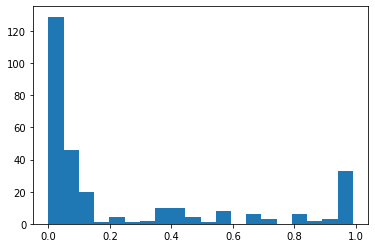

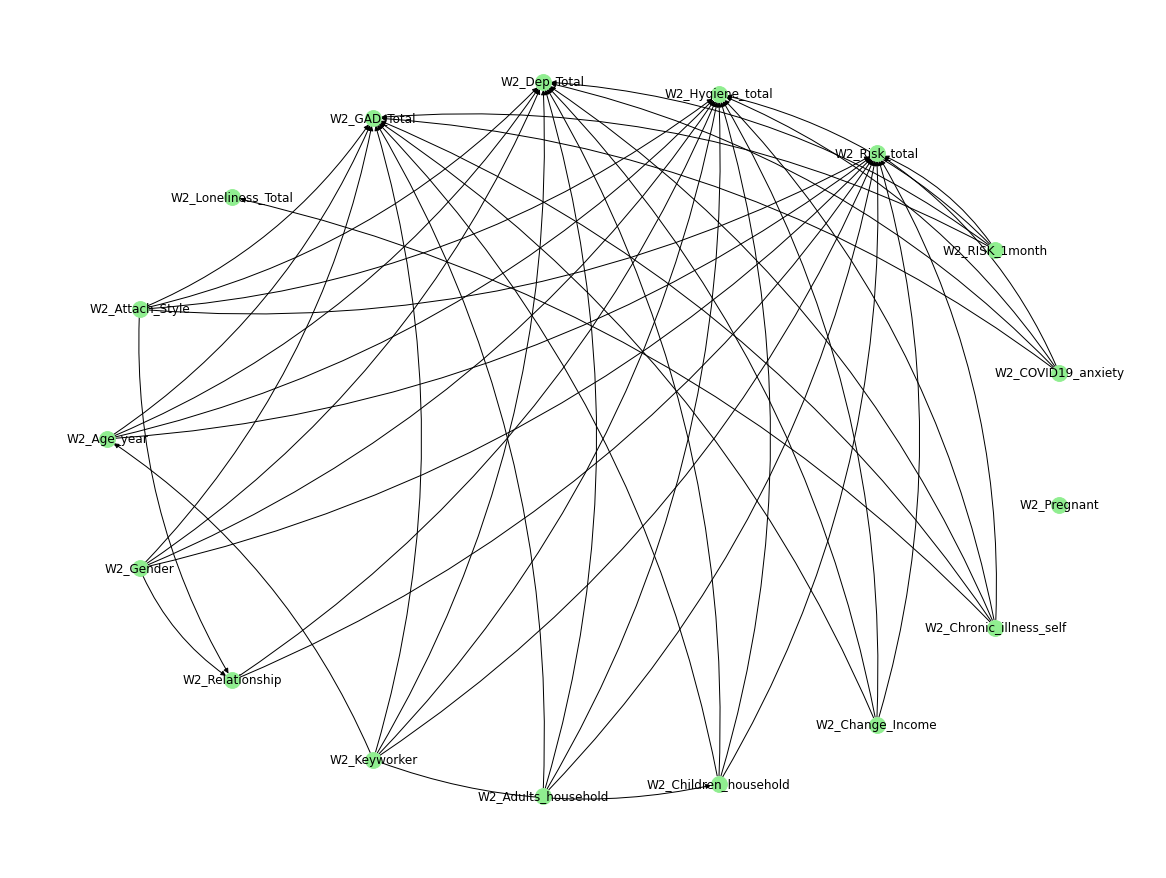

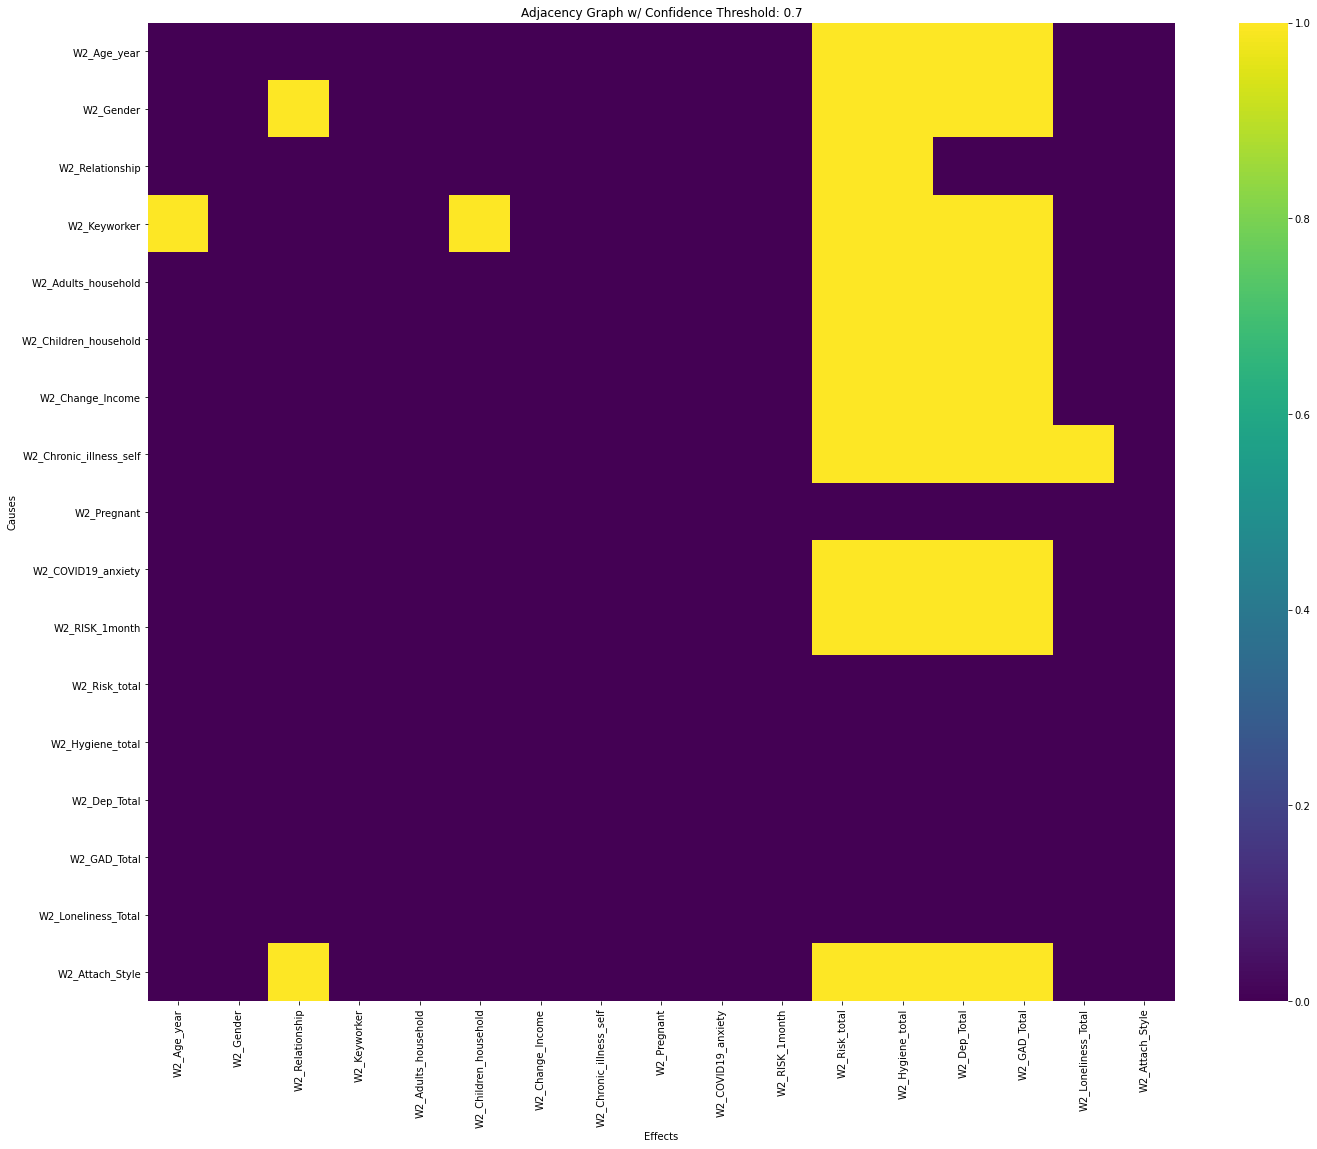

In [10]:
graph_name = 'wave_2graph_lr_0.01_dagloss_True_dagpen_0.1_numruns_50.gml'
graph_name_short = '.'.join(graph_name.split('.')[:-1])

output = nx.read_gml("graphs/" + graph_name, destringizer=int)

threshold = 0.7
G_thresh = threshold_graph(output, threshold=threshold)
plot_subbgraph(G=G_thresh, variables=cols, subgraph_name=title+graph_name_short + '_all_{}'.format(threshold), size=(16,12), plot_adj=True)

parents: ['W2_Age_year', 'W2_Gender', 'W2_Relationship', 'W2_Keyworker', 'W2_Adults_household', 'W2_Children_household', 'W2_Change_Income', 'W2_Chronic_illness_self', 'W2_COVID19_anxiety', 'W2_RISK_1month', 'W2_Attach_Style']
children: []


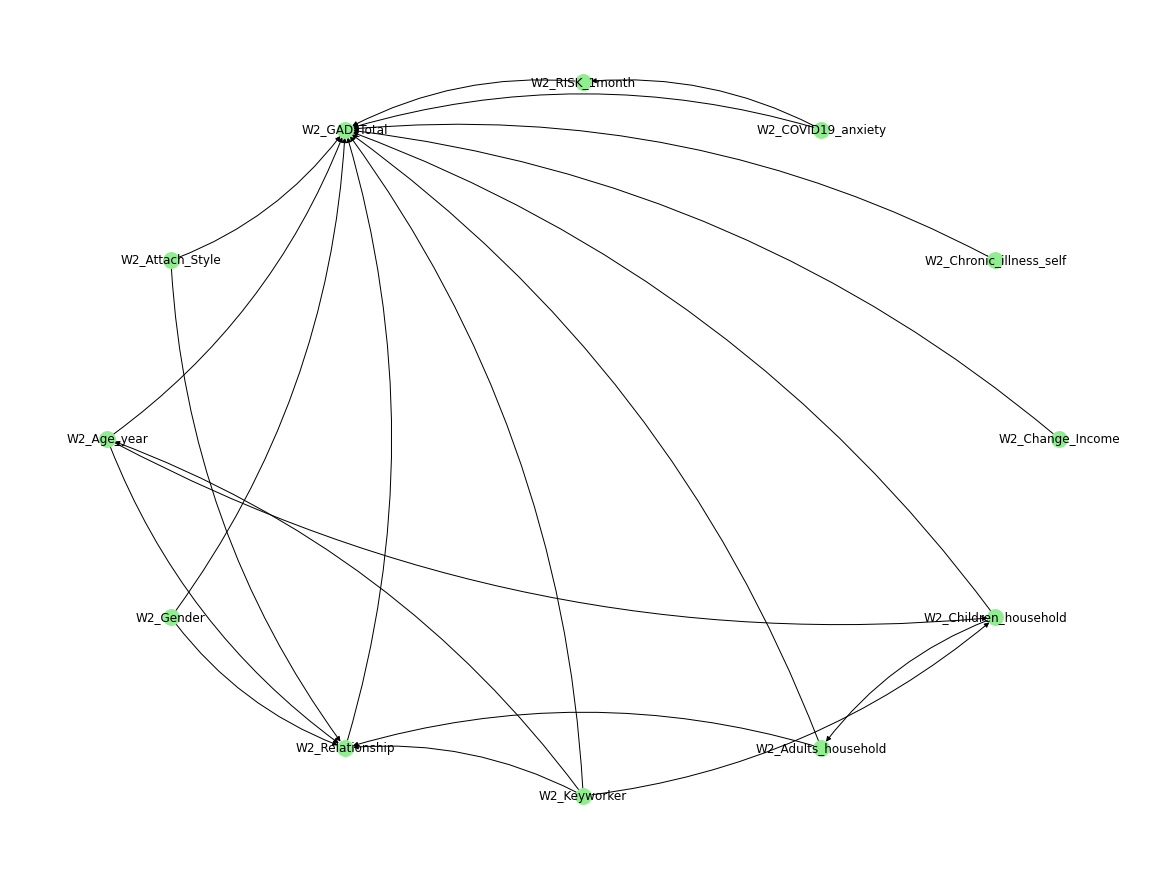

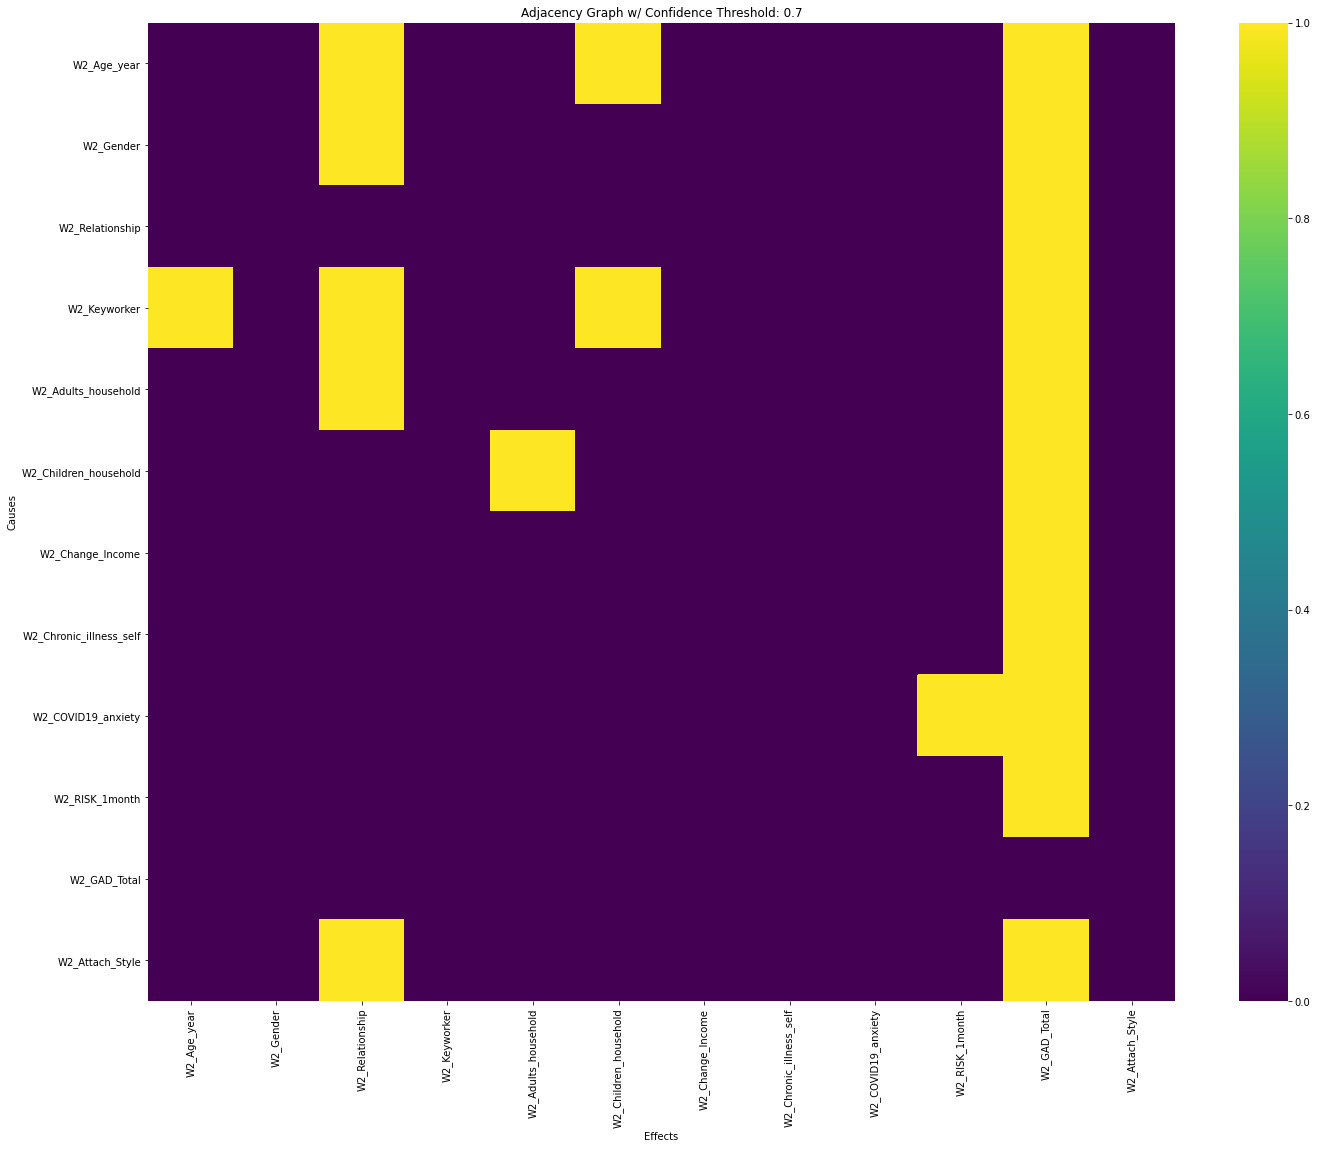

In [43]:
rents, children = get_rents_children(G_thresh, 'W2_GAD_Total')
print('parents:',rents)
print('children:', children)
plot_subbgraph(G=G_thresh, subgraph_name=title+graph_name_short +'W2_GAD_Total_{}'.format(threshold), variables=rents+children+['W2_GAD_Total'], size=(16,12), plot_adj=True)